#### Загрузим данные и посмотрим на них

In [60]:
!pip install matplotlib -q
!pip install pandas -q

import warnings
import matplotlib.pyplot as plt

from pandas import DataFrame

warnings.filterwarnings("ignore")

!pip install pandas -q

import pandas as pd
# Хак чтобы работало на Anaconda под MacOs 10.15.7 Catalina
pd.DataFrame.iteritems = pd.DataFrame.items

import numpy as np

In [167]:
!pip install torch -q

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [169]:
import os

os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

import random

def seed_everything(seed: int = 777) -> None:
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.use_deterministic_algorithms(True)
    print(f"Using {seed} seed")


# Зафиксируем SEED
seed_everything()

Using 777 seed


In [165]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [170]:
!pip install plotly -q

import plotly.graph_objects as go

def linear_plot(x, y, title):
    fig = go.Figure([go.Scatter(x = x, y = y, mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      title=title)
    fig.show()

In [62]:
symbol = 'ETH/USDT'
timeframe = '1h'
start_date = '2020-01-01T00:00:00Z'

In [63]:
!pip install ccxt -q

import ccxt
import time

def get_data(symbol, timeframe, since):
    exchange = ccxt.binance()
    since = exchange.parse8601(since)
    all_ohlcvs = []
    
    while True:
        try:
            ohlcvs = exchange.fetch_ohlcv(symbol, timeframe, since)
            all_ohlcvs += ohlcvs
            if len(ohlcvs):
                print('Fetched', len(ohlcvs), symbol, timeframe, 'candles from', exchange.iso8601(ohlcvs[0][0]))
                since = ohlcvs[-1][0] + 1
                sleep_interval = exchange.rateLimit / 1000
                print('Sleep for', sleep_interval)
                time.sleep(sleep_interval)
            else:
                break
        except Exception as e:
            print(type(e).__name__, str(e))
    print('Fetched', len(all_ohlcvs), symbol, timeframe, 'candles in total')
    return pd.DataFrame(all_ohlcvs)

In [64]:
def save_data_to_file(_data, _symbol, _timeframe):
    _data.columns = ['date','open','high','low','close','volume']
    _data = _data.sort_values(by='date')
    _data = _data.drop_duplicates(subset='date').reset_index(drop=True)
    _data['date'] = pd.to_datetime(_data['date'], unit='ms')
    _data.to_csv(_symbol.replace('/', '_') + '_' + _timeframe + '.csv', index=False)

In [68]:
def read_data_from_file(_symbol, _timeframe):
    _df = pd.read_csv(_symbol.replace('/', '_') + '_' + _timeframe + '.csv')
    _df = _df.sort_values(by='date')
    _df = _df.drop_duplicates(subset='date').reset_index(drop=True)
    _df['date'] = pd.to_datetime(_df['date'])
    _df.set_index('date', inplace=True)
    # Удалим значения где нет объемов
    _df = _df.drop(_df[_df['volume']==0.0].index)
    return _df

In [66]:
save_data_to_file(get_data(symbol, timeframe, start_date), symbol, timeframe)

Fetched 500 ETH/USDT 1h candles from 2020-01-01T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-01-21T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-02-11T17:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-03-03T18:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-03-24T15:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-04-14T11:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-05-05T09:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-05-26T05:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-06-16T01:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-07-07T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-07-27T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-08-17T16:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2020-09-07T12:00:00.000Z
Sleep for 0.05

In [124]:
df = read_data_from_file(symbol, timeframe)
df

open     high      low    close       volume
date                                                                
2020-01-01 00:00:00   129.16   129.19   128.68   128.87   7769.17336
2020-01-01 01:00:00   128.87   130.65   128.78   130.64  11344.65516
2020-01-01 02:00:00   130.63   130.98   130.35   130.85   7603.35623
2020-01-01 03:00:00   130.85   130.89   129.94   130.20   4968.55433
2020-01-01 04:00:00   130.21   130.74   130.15   130.20   3397.90747
...                      ...      ...      ...      ...          ...
2025-01-31 08:00:00  3241.63  3249.08  3234.05  3237.01  15422.32400
2025-01-31 09:00:00  3237.01  3271.33  3235.00  3266.40  14051.46310
2025-01-31 10:00:00  3266.40  3272.00  3256.57  3269.68  13877.81080
2025-01-31 11:00:00  3269.67  3338.55  3269.67  3335.16  50510.16670
2025-01-31 12:00:00  3335.16  3359.72  3325.30  3354.77  29240.67010

[44547 rows x 5 columns]

In [73]:
linear_plot(x=df.index, y=df['close'], title = 'ETH/USDT')

In [74]:
df.shape

(44547, 5)

In [75]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [76]:
df.describe()

open          high           low         close         volume
count  44547.000000  44547.000000  44547.000000  44547.000000   44547.000000
mean    2003.101703   2014.007792   1991.424398   2003.173353   26798.478664
std     1151.003443   1157.182527   1144.293119   1150.987375   29122.993698
min       96.510000    105.690000     86.000000     96.620000     161.748770
25%     1263.430000   1268.500000   1256.040000   1263.500000   10120.474095
50%     1880.240000   1888.220000   1873.520000   1880.250000   18131.918260
75%     2946.945000   2960.975000   2930.640000   2946.995000   32613.704635
max     4846.940000   4868.000000   4833.190000   4846.710000  493227.882820

In [125]:
def create_trend_features(df, features, lag_periods):
    """
    Добавляет классические финансовые признаки: отношение к предыдущим периодам, логарифмические изменения и индикаторы трендов.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить индикаторы
    lag_periods: сколько периодов назад учитывать для расчетов
    
    Возвращает:
    - обновленный DataFrame с новыми фичами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    for feature in features:
        # Отношение текущего значения к предыдущему (лаг = 1)
        df[f'{feature}_ratio_1'] = df[feature] / df[feature].shift(1)
        new_columns.append(f'{feature}_ratio_1')
        
        # Логарифмическое изменение (логарифм отношения текущего значения к предыдущему)
        df[f'{feature}_log_diff_1'] = np.log(df[feature] / df[feature].shift(1))
        new_columns.append(f'{feature}_log_diff_1')
        
        # Momentum (разница между текущим значением и значением N периодов назад)
        df[f'{feature}_momentum_{lag_periods}'] = df[feature] - df[feature].shift(lag_periods)
        new_columns.append(f'{feature}_momentum_{lag_periods}')
        
        # Rate of Change (ROC): процентное изменение за N периодов
        df[f'{feature}_roc_{lag_periods}'] = (df[feature] - df[feature].shift(lag_periods)) / df[feature].shift(lag_periods) * 100
        new_columns.append(f'{feature}_roc_{lag_periods}')
        
        # Exponential Moving Average (EMA) с периодом N
        df[f'{feature}_ema_{lag_periods}'] = df[feature].ewm(span=lag_periods, adjust=False).mean()
        new_columns.append(f'{feature}_ema_{lag_periods}')
    
    # Удаление строк с NaN значениями, которые появились из-за сдвигов
    df = df.dropna()
    
    return df, new_columns

In [126]:
def create_macd(df, feature, short_window=12, long_window=26):
    """
    Добавляет индикатор MACD (разница между краткосрочным и долгосрочным EMA).
    
    df: DataFrame с исходными данными
    feature: признак, для которого необходимо рассчитать MACD
    short_window: окно для краткосрочного EMA (по умолчанию 12)
    long_window: окно для долгосрочного EMA (по умолчанию 26)
    
    Возвращает:
    - обновленный DataFrame с MACD
    - название новой колонки с MACD
    """
    df = df.copy()
    
    # Рассчитываем краткосрочное и долгосрочное EMA
    ema_short = df[feature].ewm(span=short_window, adjust=False).mean()
    ema_long = df[feature].ewm(span=long_window, adjust=False).mean()
    
    # Разница между краткосрочным и долгосрочным EMA (MACD)
    df[f'{feature}_macd'] = ema_short - ema_long
    
    return df, f'{feature}_macd'

In [171]:
def create_lag_features(df, features, lag_periods):
    """
    Добавляет лаги для указанных признаков на указанное количество периодов назад.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить лаги
    lag_periods: сколько лагов назад необходимо создать
    Возвращает: 
    - обновленный DataFrame с лагами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    # Для каждого признака создаем лаги
    for feature in features:
        for lag in range(1, lag_periods + 1):
            new_col_name = f'{feature}_lag_{lag}'
            df[new_col_name] = df[feature].shift(lag)
            new_columns.append(new_col_name)
    
    # Удаляем строки с NaN значениями, которые появились из-за сдвигов
    df = df.dropna()
    
    return df, new_columns

In [128]:
# Параметры для создания трендовых признаков
lag_periods = 10  # Например, 3 периода назад
features_to_trend = ['open', 'high', 'low', 'close', 'volume']
#features_to_trend = ['close']
features_to_lag = ['close']

# Создаем трендовые признаки
data_with_trend, new_trend_features = create_trend_features(df, features_to_trend, lag_periods)

# Добавляем MACD для признака 'close'
data_with_trend, macd_column = create_macd(data_with_trend, 'close')

# Добавляем название колонки с MACD в список новых фичей
new_trend_features.append(macd_column)

In [129]:
# Создаем лаги в данных
data_with_trend_and_lags, lags_columns = create_lag_features(data_with_trend, features_to_lag, lag_periods)
data_with_trend_and_lags

open     high      low    close       volume  \
date                                                                   
2020-01-01 20:00:00   131.86   132.25   131.70   132.18   2014.79285   
2020-01-01 21:00:00   132.17   132.37   131.68   131.78   4879.42025   
2020-01-01 22:00:00   131.82   131.82   129.90   130.27  14876.06749   
2020-01-01 23:00:00   130.28   130.87   129.74   130.77   3865.45991   
2020-01-02 00:00:00   130.72   130.78   130.27   130.67   3772.66670   
...                      ...      ...      ...      ...          ...   
2025-01-31 08:00:00  3241.63  3249.08  3234.05  3237.01  15422.32400   
2025-01-31 09:00:00  3237.01  3271.33  3235.00  3266.40  14051.46310   
2025-01-31 10:00:00  3266.40  3272.00  3256.57  3269.68  13877.81080   
2025-01-31 11:00:00  3269.67  3338.55  3269.67  3335.16  50510.16670   
2025-01-31 12:00:00  3335.16  3359.72  3325.30  3354.77  29240.67010   

                     open_ratio_1  open_log_diff_1  open_momentum_10  \
date                                                                   
2020-01-01 20:00:00      0.998637        -0.001364              1.69   
2020-01-01 21:00:00      1.002351         0.002348              1.50   
2020-01-01 22:00:00      0.997352        -0.002652              1.08   
2020-01-01 23:00:00      0.988317        -0.011751             -1.32   
2020-01-02 00:00:00      1.003377         0.003372             -0.94   
...                           ...              ...               ...   
2025-01-31 08:00:00      0.993469        -0.006552             -2.72   
2025-01-31 09:00:00      0.998575        -0.001426            -23.87   
2025-01-31 10:00:00      1.009079         0.009038             19.02   
2025-01-31 11:00:00      1.001001         0.001001             -0.83   
2025-01-31 12:00:00      1.020030         0.019832             64.53   

                     open_roc_10  open_ema_10  ...  close_lag_1  close_lag_2  \
date                                           ...                             
2020-01-01 20:00:00     1.298302   131.737286  ...       131.86       132.04   
2020-01-01 21:00:00     1.147930   131.815961  ...       132.18       131.86   
2020-01-01 22:00:00     0.826067   131.816696  ...       131.78       132.18   
2020-01-01 23:00:00    -1.003040   131.537296  ...       130.27       131.78   
2020-01-02 00:00:00    -0.713960   131.388697  ...       130.77       130.27   
...                          ...          ...  ...          ...          ...   
2025-01-31 08:00:00    -0.083838  3246.818878  ...      3241.63      3262.93   
2025-01-31 09:00:00    -0.732011  3245.035445  ...      3237.01      3241.63   
2025-01-31 10:00:00     0.585703  3248.919910  ...      3266.40      3237.01   
2025-01-31 11:00:00    -0.025378  3252.692653  ...      3269.68      3266.40   
2025-01-31 12:00:00     1.973014  3267.686716  ...      3335.16      3269.68   

                     close_lag_3  close_lag_4  close_lag_5  close_lag_6  \
date                                                                      
2020-01-01 20:00:00       132.34       132.85       132.08       131.96   
2020-01-01 21:00:00       132.04       132.34       132.85       132.08   
2020-01-01 22:00:00       131.86       132.04       132.34       132.85   
2020-01-01 23:00:00       132.18       131.86       132.04       132.34   
2020-01-02 00:00:00       131.78       132.18       131.86       132.04   
...                          ...          ...          ...          ...   
2025-01-31 08:00:00      3245.32      3216.61      3230.65      3247.61   
2025-01-31 09:00:00      3262.93      3245.32      3216.61      3230.65   
2025-01-31 10:00:00      3241.63      3262.93      3245.32      3216.61   
2025-01-31 11:00:00      3237.01      3241.63      3262.93      3245.32   
2025-01-31 12:00:00      3266.40      3237.01      3241.63      3262.93   

                     close_lag_7  close_lag_8  close_lag_9  close_lag_10  
date                                                      

In [144]:
ml_columns = new_trend_features + features_to_trend #+ lags_columns
ml_columns

['open_ratio_1',
 'open_log_diff_1',
 'open_momentum_10',
 'open_roc_10',
 'open_ema_10',
 'high_ratio_1',
 'high_log_diff_1',
 'high_momentum_10',
 'high_roc_10',
 'high_ema_10',
 'low_ratio_1',
 'low_log_diff_1',
 'low_momentum_10',
 'low_roc_10',
 'low_ema_10',
 'close_ratio_1',
 'close_log_diff_1',
 'close_momentum_10',
 'close_roc_10',
 'close_ema_10',
 'volume_ratio_1',
 'volume_log_diff_1',
 'volume_momentum_10',
 'volume_roc_10',
 'volume_ema_10',
 'close_macd',
 'open',
 'high',
 'low',
 'close',
 'volume']

In [145]:
data = data_with_trend_and_lags[ml_columns]
data

open_ratio_1  open_log_diff_1  open_momentum_10  \
date                                                                   
2020-01-01 20:00:00      0.998637        -0.001364              1.69   
2020-01-01 21:00:00      1.002351         0.002348              1.50   
2020-01-01 22:00:00      0.997352        -0.002652              1.08   
2020-01-01 23:00:00      0.988317        -0.011751             -1.32   
2020-01-02 00:00:00      1.003377         0.003372             -0.94   
...                           ...              ...               ...   
2025-01-31 08:00:00      0.993469        -0.006552             -2.72   
2025-01-31 09:00:00      0.998575        -0.001426            -23.87   
2025-01-31 10:00:00      1.009079         0.009038             19.02   
2025-01-31 11:00:00      1.001001         0.001001             -0.83   
2025-01-31 12:00:00      1.020030         0.019832             64.53   

                     open_roc_10  open_ema_10  high_ratio_1  high_log_diff_1  \
date                                                                           
2020-01-01 20:00:00     1.298302   131.737286      1.000681         0.000681   
2020-01-01 21:00:00     1.147930   131.815961      1.000907         0.000907   
2020-01-01 22:00:00     0.826067   131.816696      0.995845        -0.004164   
2020-01-01 23:00:00    -1.003040   131.537296      0.992793        -0.007233   
2020-01-02 00:00:00    -0.713960   131.388697      0.999312        -0.000688   
...                          ...          ...           ...              ...   
2025-01-31 08:00:00    -0.083838  3246.818878      0.991501        -0.008535   
2025-01-31 09:00:00    -0.732011  3245.035445      1.006848         0.006825   
2025-01-31 10:00:00     0.585703  3248.919910      1.000205         0.000205   
2025-01-31 11:00:00    -0.025378  3252.692653      1.020339         0.020135   
2025-01-31 12:00:00     1.973014  3267.686716      1.006341         0.006321   

                     high_momentum_10  high_roc_10  high_ema_10  ...  \
date                                                             ...   
2020-01-01 20:00:00              1.43     1.093105   132.127238  ...   
2020-01-01 21:00:00              0.50     0.379161   132.171376  ...   
2020-01-01 22:00:00              0.21     0.159562   132.107490  ...   
2020-01-01 23:00:00             -1.03    -0.780895   131.882492  ...   
2020-01-02 00:00:00             -1.59    -1.201179   131.682039  ...   
...                               ...          ...          ...  ...   
2025-01-31 08:00:00            -22.92    -0.700489  3260.842765  ...   
2025-01-31 09:00:00              1.33     0.040673  3262.749535  ...   
2025-01-31 10:00:00              0.40     0.012226  3264.431438  ...   
2025-01-31 11:00:00             64.66     1.975021  3277.907540  ...   
2025-01-31 12:00:00             80.22     2.446105  3292.782533  ...   

                     volume_log_diff_1  volume_momentum_10  volume_roc_10  \
date                                                                        
2020-01-01 20:00:00          -0.046747         -2610.70885     -56.441636   
2020-01-01 21:00:00           0.884510         -5968.37007     -55.019224   
2020-01-01 22:00:00           1.114727         10712.76082     257.313757   
2020-01-01 23:00:00          -1.347673         -3295.19311     -46.018053   
2020-01-02 00:00:00          -0.024299         -3552.59092     -48.497829   
...                                ...                 ...            ...   
2025-01-31 08:00:00          -0.285223          8237.27790     114.644747   
2025-01-31 09:00:00          -0.093090          7592.62290     117.553967   
2025-01-31 10:00:00          -0.012435          3285.78720      31.021336   
2025-01-31 11:00:00           1.291883         42202.15050     507.969044   
2025-01-31 12:00:00          -0.546614         17947.02250     158.912542   

                     volume_ema_10  close_macd     open     high      low  \
date                       

#### Разобьем данные на обучающую и тестовую выборки

In [146]:
window_size = 10

def get_data_loader(data):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)

        if data['close'].iloc[i + window_size] > data['close'].iloc[i + window_size - 1]:
            y.append(2)  # Buy
        elif data['close'].iloc[i + window_size] < data['close'].iloc[i + window_size - 1]:
            y.append(0)  # Sell
        else:
            y.append(1)  # Hold

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=32, shuffle=False)

In [147]:
# Определяем дату начала тестовой выборки
test_start_date = data.index.max() - pd.DateOffset(months=12)

# Разделение данных на тренировочную и тестовую выборки по времени
train_data = data[data.index < test_start_date]
test_data = data[data.index >= test_start_date]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

loader_train = get_data_loader(train_data)
loader_test = get_data_loader(test_data)

Train size: 35742, Test size: 8785


Напишем метод обучения модели и расчета метрик качества

In [148]:
!pip install torchmetrics -q

from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

def train_model(model, dataloader, num_epochs=10, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr)
    
    accuracy = MulticlassAccuracy(num_classes=3, average="weighted")
    precision = MulticlassPrecision(num_classes=3, average="weighted")
    recall = MulticlassRecall(num_classes=3, average="weighted")
    f1_score = MulticlassF1Score(num_classes=3, average="weighted")

    all_metrics = []

    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            
            accuracy.update(outputs, labels)
            precision.update(outputs, labels)
            recall.update(outputs, labels)
            f1_score.update(outputs, labels)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        metrics = {
            'Loss': loss.item(),
            'Precision': precision.compute().item(),
            'Recall': recall.compute().item(),
            'Accuracy': accuracy.compute().item(),
            'F1-Score': f1_score.compute().item()
        }
        print("Metrics")
        print(metrics)
        all_metrics.append(metrics)
        
        #reset metrics
        precision.reset()
        recall.reset()
        accuracy.reset()
        f1_score.reset()
        
    metrics_df = pd.DataFrame(all_metrics)
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Loss'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Loss',
                      title="Loss/Epoch")
    fig.show()
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Accuracy'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Accuracy',
                      title="Accuracy/Epoch")
    fig.show()

#### CNN модель

In [149]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(31, 16, kernel_size=3)  # Input: 31 channels, Output: 16 channels
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3)  # Input: 16 channels, Output: 32 channels
        self.fc1 = nn.Linear(32 * (window_size - 4), 64)  # Flattened size after conv
        self.fc2 = nn.Linear(64, 3)  # Output: 3 classes (Buy, Hold, Sell)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, sequence_length) -> [32, 5, 30]
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the output from convolution layers
        x = torch.relu(self.fc1(x))
        return self.fc2(x)  # Return logits (raw output) for each class

Обучим модель

In [150]:
cnn = CNN()
train_model(cnn, loader_train, num_epochs=10, lr=0.0005)

Epoch [1/10]
Metrics
{'Loss': 0.8173948526382446, 'Precision': 0.49684250354766846, 'Recall': 0.49834883213043213, 'Accuracy': 0.49834883213043213, 'F1-Score': 0.49165230989456177}
Epoch [2/10]
Metrics
{'Loss': 0.7075318694114685, 'Precision': 0.49690237641334534, 'Recall': 0.5013153553009033, 'Accuracy': 0.5013153553009033, 'F1-Score': 0.47017037868499756}
Epoch [3/10]
Metrics
{'Loss': 0.6986402273178101, 'Precision': 0.5010711550712585, 'Recall': 0.5042259097099304, 'Accuracy': 0.5042259097099304, 'F1-Score': 0.47925832867622375}
Epoch [4/10]
Metrics
{'Loss': 0.6992899179458618, 'Precision': 0.5014605522155762, 'Recall': 0.5045617818832397, 'Accuracy': 0.5045617818832397, 'F1-Score': 0.47918128967285156}
Epoch [5/10]
Metrics
{'Loss': 0.7010642886161804, 'Precision': 0.5040669441223145, 'Recall': 0.5066047310829163, 'Accuracy': 0.5066047310829163, 'F1-Score': 0.4843887686729431}
Epoch [6/10]
Metrics
{'Loss': 0.7015742063522339, 'Precision': 0.5020010471343994, 'Recall': 0.505121469497

Посмотрим на предсказания на тестовых данных

In [172]:
!pip install torchmetrics -q

from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

def predict(model, loader):
    model.eval()
    
    all_predictions = []
    all_targets = []

    accuracy = MulticlassAccuracy(num_classes=3, average="weighted")
    precision = MulticlassPrecision(num_classes=3, average="weighted")
    recall = MulticlassRecall(num_classes=3, average="weighted")
    f1_score = MulticlassF1Score(num_classes=3, average="weighted")
    
    with torch.no_grad():
        for inputs, targets in loader:
            # print("Inputs")
            # print(f"Inputs shape: {inputs.shape}")
            # print(f"Inputs data: {inputs}")
            # print(f"Targets shape: {targets.shape}")
            # print(f"Targets data: {targets.data}")
            outputs = model(inputs)
            
            accuracy.update(outputs, targets)
            precision.update(outputs, targets)
            recall.update(outputs, targets)
            f1_score.update(outputs, targets)
            
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.numpy())
            all_targets.extend(targets.numpy())
        
        metrics = {
            'Precision': precision.compute().item(),
            'Recall': recall.compute().item(),
            'Accuracy': accuracy.compute().item(),
            'F1-Score': f1_score.compute().item()
        }
        print(f"Metrics {metrics}")
        
        #reset metrics
        precision.reset()
        recall.reset()
        accuracy.reset()
        f1_score.reset()
    return all_predictions, all_targets

In [152]:
# Plot actual vs predicted labels
def plot(all_predictions, all_targets, title):
    plt.figure(figsize=(12, 6))
    plt.plot(all_targets[-90:], label='Actual', color='blue', linestyle='--', alpha=0.3)
    plt.plot(all_predictions[-90:], label='Predicted', color='red', alpha=0.7)
    plt.title(title)
    plt.xlabel("Time Step")
    plt.ylabel("Signal (0=Sell, 1=Hold, 2=Buy)")
    plt.legend()
    plt.show()

Metrics {'Precision': 0.2580987215042114, 'Recall': 0.5080341696739197, 'Accuracy': 0.5080341696739197, 'F1-Score': 0.3422982692718506}


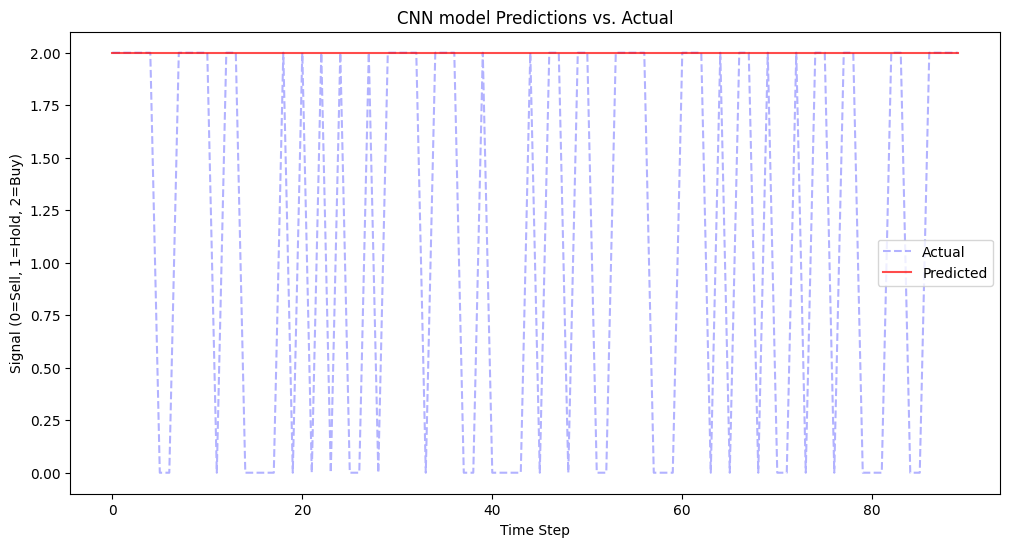

In [153]:
all_predictions, all_targets = predict(cnn, loader_test)
plot(all_predictions, all_targets, "CNN model Predictions vs. Actual")

In [29]:
test_data

open_ratio_1  open_log_diff_1  open_momentum_3  open_roc_3  \
date                                                                     
2024-10-31      1.007727         0.007697           151.39    6.036765   
2024-11-01      0.947134        -0.054314           -48.88   -1.903805   
2024-11-02      0.997173        -0.002831          -127.31   -4.824541   
2024-11-03      0.993128        -0.006896          -164.96   -6.203393   
2024-11-04      0.985366        -0.014742           -60.88   -2.417206   
...                  ...              ...              ...         ...   
2025-01-27      0.974042        -0.026301          -105.61   -3.163662   
2025-01-28      0.984480        -0.015642          -127.66   -3.856681   
2025-01-29      0.967094        -0.033459          -241.04   -7.262954   
2025-01-30      1.011755         0.011687          -118.71   -3.672265   
2025-01-31      1.042866         0.041973            64.94    2.040573   

             open_ema_3  high_ratio_1  high_log_diff_1  high_momentum_3  \
date                                                                      
2024-10-31  2622.709387      0.980421        -0.019773            79.33   
2024-11-01  2570.659693      0.969202        -0.031282           -95.06   
2024-11-02  2541.074847      0.975510        -0.024795          -198.85   
2024-11-03  2517.652423      0.989277        -0.010781          -172.61   
2024-11-04  2487.691212      0.997997        -0.002005           -95.41   
...                 ...           ...              ...              ...   
2025-01-27  3273.032144      0.967849        -0.032679          -174.09   
2025-01-28  3227.736072      0.990504        -0.009542          -127.67   
2025-01-29  3152.728036      0.987437        -0.012642          -179.48   
2025-01-30  3133.314018      1.031708         0.031215            29.52   
2025-01-31  3190.347009      1.018627         0.018456           121.58   

            high_roc_3   high_ema_3  ...  volume_log_diff_1  \
date                                 ...                      
2024-10-31    3.063325  2670.826995  ...          -0.132593   
2024-11-01   -3.544555  2628.813497  ...           0.064368   
2024-11-02   -7.304485  2576.131749  ...          -1.081024   
2024-11-03   -6.467216  2536.260874  ...           0.637094   
2024-11-04   -3.688341  2513.825437  ...           0.104186   
...                ...          ...  ...                ...   
2025-01-27   -5.078471  3311.102651  ...           1.017661   
2025-01-28   -3.810271  3267.056325  ...          -0.763400   
2025-01-29   -5.338489  3224.788163  ...           0.154845   
2025-01-30    0.907216  3254.109081  ...          -0.155758   
2025-01-31    3.772250  3299.349541  ...          -0.595236   

            volume_momentum_3  volume_roc_3   volume_ema_3  close_macd  \
date                                                                     
2024-10-31         42821.8747     11.874998  410451.005230   13.911816   
2024-11-01        -21666.5952     -4.794389  420350.056265    8.423868   
2024-11-02       -314665.9960    -68.312520  283155.593132    2.651328   
2024-11-03       -127418.0820    -31.583909  279582.356416   -4.813212   
2024-11-04       -123932.1428    -28.804741  292949.660458  -15.354682   
...                       ...           ...            ...         ...   
2025-01-27        301480.4777     66.769495  535749.045787  -49.447321   
2025-01-28        142400.6758     68.278352  443354.381543  -62.218783   
2025-01-29        137571.7886     50.547114  426545.819572  -68.629714   
2025-01-30       -402365.2706    -53.434626  388592.650936  -62.221643   
2025-01-31       -157605.7486    -44.907076  290973.309818  -48.966299   

               open     high      low    close       volume  
date                                                         
2024-10-31  2659.19  2669.00  2503.00  2518.61  403427.2017  
2024-11-01  2518.61  2586.80  2467.67  2511.49  430249.1073  
2024-11-02  2511.49  2523.45  2470.00  249

In [30]:
test_data_df = test_data.copy()
test_data_df = test_data_df.reset_index()
test_data_df

date  open_ratio_1  open_log_diff_1  open_momentum_3  open_roc_3  \
0  2024-10-31      1.007727         0.007697           151.39    6.036765   
1  2024-11-01      0.947134        -0.054314           -48.88   -1.903805   
2  2024-11-02      0.997173        -0.002831          -127.31   -4.824541   
3  2024-11-03      0.993128        -0.006896          -164.96   -6.203393   
4  2024-11-04      0.985366        -0.014742           -60.88   -2.417206   
..        ...           ...              ...              ...         ...   
88 2025-01-27      0.974042        -0.026301          -105.61   -3.163662   
89 2025-01-28      0.984480        -0.015642          -127.66   -3.856681   
90 2025-01-29      0.967094        -0.033459          -241.04   -7.262954   
91 2025-01-30      1.011755         0.011687          -118.71   -3.672265   
92 2025-01-31      1.042866         0.041973            64.94    2.040573   

     open_ema_3  high_ratio_1  high_log_diff_1  high_momentum_3  high_roc_3  \
0   2622.709387      0.980421        -0.019773            79.33    3.063325   
1   2570.659693      0.969202        -0.031282           -95.06   -3.544555   
2   2541.074847      0.975510        -0.024795          -198.85   -7.304485   
3   2517.652423      0.989277        -0.010781          -172.61   -6.467216   
4   2487.691212      0.997997        -0.002005           -95.41   -3.688341   
..          ...           ...              ...              ...         ...   
88  3273.032144      0.967849        -0.032679          -174.09   -5.078471   
89  3227.736072      0.990504        -0.009542          -127.67   -3.810271   
90  3152.728036      0.987437        -0.012642          -179.48   -5.338489   
91  3133.314018      1.031708         0.031215            29.52    0.907216   
92  3190.347009      1.018627         0.018456           121.58    3.772250   

    ...  volume_log_diff_1  volume_momentum_3  volume_roc_3   volume_ema_3  \
0   ...          -0.132593         42821.8747     11.874998  410451.005230   
1   ...           0.064368        -21666.5952     -4.794389  420350.056265   
2   ...          -1.081024       -314665.9960    -68.312520  283155.593132   
3   ...           0.637094       -127418.0820    -31.583909  279582.356416   
4   ...           0.104186       -123932.1428    -28.804741  292949.660458   
..  ...                ...                ...           ...            ...   
88  ...           1.017661        301480.4777     66.769495  535749.045787   
89  ...          -0.763400        142400.6758     68.278352  443354.381543   
90  ...           0.154845        137571.7886     50.547114  426545.819572   
91  ...          -0.155758       -402365.2706    -53.434626  388592.650936   
92  ...          -0.595236       -157605.7486    -44.907076  290973.309818   

    close_macd     open     high      low    close       volume  
0    13.911816  2659.19  2669.00  2503.00  2518.61  403427.2017  
1     8.423868  2518.61  2586.80  2467.67  2511.49  430249.1073  
2     2.651328  2511.49  2523.45  2470.00  2494.23  145961.1300  
3    -4.813212  2494.23  2496.39  2411.00  2457.73  276009.1197  
4   -15.354682  2457.73  2491.39  2357.59  2398.21  306316.9645  
..         ...      ...      ...      ...      ...          ...  
88  -49.447321  3232.61  3253.91  3020.01  3182.44  753004.7529  
89  -62.218783  3182.44  3223.01  3040.03  3077.72  350959.7173  
90  -68.629714  3077.72  3182.52  3054.06  3113.90  409737.2576  
91  -62.221643  3113.90  3283.43  3091.06  3247.39  350639.4823  
92  -48.966299  3247.38  3344.59  3213.80  3341.73  193353.9687  

[93 rows x 32 columns]

In [31]:
len(all_predictions)

63

Необходимо добавить сигналы в тестовый набор данных для прохождения бэктеста

In [32]:
predictions_df = pd.DataFrame(all_predictions, columns=['signal'])
predictions_df

signal
0        0
1        2
2        2
3        2
4        0
..     ...
58       0
59       2
60       2
61       2
62       0

[63 rows x 1 columns]

In [33]:
predictions_df.index = test_data_df.index[window_size:]
features_to_trend.append('date')
df = pd.concat([test_data_df[features_to_trend], predictions_df], axis=1).dropna()
df

open     high      low    close       volume       date  signal
30  3592.22  3738.98  3568.40  3703.60  503684.7485 2024-11-30     0.0
31  3703.59  3746.80  3659.20  3707.61  429089.2633 2024-12-01     2.0
32  3707.61  3760.00  3554.32  3643.42  737130.5690 2024-12-02     2.0
33  3643.43  3670.00  3500.00  3614.51  678400.2032 2024-12-03     2.0
34  3614.51  3887.24  3614.51  3837.80  968744.0399 2024-12-04     0.0
..      ...      ...      ...      ...          ...        ...     ...
88  3232.61  3253.91  3020.01  3182.44  753004.7529 2025-01-27     0.0
89  3182.44  3223.01  3040.03  3077.72  350959.7173 2025-01-28     2.0
90  3077.72  3182.52  3054.06  3113.90  409737.2576 2025-01-29     2.0
91  3113.90  3283.43  3091.06  3247.39  350639.4823 2025-01-30     2.0
92  3247.38  3344.59  3213.80  3341.73  193353.9687 2025-01-31     0.0

[63 rows x 7 columns]

In [34]:
df.columns = df.columns.str.capitalize()
df

Open     High      Low    Close       Volume       Date  Signal
30  3592.22  3738.98  3568.40  3703.60  503684.7485 2024-11-30     0.0
31  3703.59  3746.80  3659.20  3707.61  429089.2633 2024-12-01     2.0
32  3707.61  3760.00  3554.32  3643.42  737130.5690 2024-12-02     2.0
33  3643.43  3670.00  3500.00  3614.51  678400.2032 2024-12-03     2.0
34  3614.51  3887.24  3614.51  3837.80  968744.0399 2024-12-04     0.0
..      ...      ...      ...      ...          ...        ...     ...
88  3232.61  3253.91  3020.01  3182.44  753004.7529 2025-01-27     0.0
89  3182.44  3223.01  3040.03  3077.72  350959.7173 2025-01-28     2.0
90  3077.72  3182.52  3054.06  3113.90  409737.2576 2025-01-29     2.0
91  3113.90  3283.43  3091.06  3247.39  350639.4823 2025-01-30     2.0
92  3247.38  3344.59  3213.80  3341.73  193353.9687 2025-01-31     0.0

[63 rows x 7 columns]

In [35]:
df.rename(columns={'Date': 'Datetime'}, inplace=True)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index('Datetime', inplace=True)
df["Signal"] = df["Signal"].astype(int)
df

Open     High      Low    Close       Volume  Signal
Datetime                                                           
2024-11-30  3592.22  3738.98  3568.40  3703.60  503684.7485       0
2024-12-01  3703.59  3746.80  3659.20  3707.61  429089.2633       2
2024-12-02  3707.61  3760.00  3554.32  3643.42  737130.5690       2
2024-12-03  3643.43  3670.00  3500.00  3614.51  678400.2032       2
2024-12-04  3614.51  3887.24  3614.51  3837.80  968744.0399       0
...             ...      ...      ...      ...          ...     ...
2025-01-27  3232.61  3253.91  3020.01  3182.44  753004.7529       0
2025-01-28  3182.44  3223.01  3040.03  3077.72  350959.7173       2
2025-01-29  3077.72  3182.52  3054.06  3113.90  409737.2576       2
2025-01-30  3113.90  3283.43  3091.06  3247.39  350639.4823       2
2025-01-31  3247.38  3344.59  3213.80  3341.73  193353.9687       0

[63 rows x 6 columns]

In [36]:
!pip install backtesting -q

from backtesting import Backtest, Strategy

class CNNStrategy(Strategy):
    def init(self):
        self.signal = self.I(lambda: self.data.Signal)
        self.previous_signal = 1

    def next(self):
        current_signal = self.signal[-1]
        
        if current_signal == 2:
            self.buy()
        
        elif current_signal == 0:
            self.sell()

        self.previous_signal = current_signal

Loading BokehJS ...

In [37]:
# Создаем объект класса Backtest с текущей стратегией
bt = Backtest(df, CNNStrategy, cash=1_000_000, commission=.002, exclusive_orders=True)

# Запускаем бэктест
stats = bt.run()
bt.plot()

GridPlot(id='p1564', ...)

In [38]:
print(stats)

Start                     2024-11-30 00:00:00
End                       2025-01-31 00:00:00
Duration                     62 days 00:00:00
Exposure Time [%]                   96.825397
Equity Final [$]                 999858.87648
Equity Peak [$]                  1000429.8812
Return [%]                          -0.014112
Buy & Hold Return [%]               -9.770764
Return (Ann.) [%]                   -0.081734
Volatility (Ann.) [%]                0.223066
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.142949
Avg. Drawdown [%]                   -0.061444
Max. Drawdown Duration       46 days 00:00:00
Avg. Drawdown Duration       20 days 00:00:00
# Trades                                   25
Win Rate [%]                             56.0
Best Trade [%]                      11.220283
Worst Trade [%]                    -10.465094
Avg. Trade [%]                    

In [186]:
df = read_data_from_file(symbol, timeframe)
df

open     high      low    close       volume
date                                                                
2020-01-01 00:00:00   129.16   129.19   128.68   128.87   7769.17336
2020-01-01 01:00:00   128.87   130.65   128.78   130.64  11344.65516
2020-01-01 02:00:00   130.63   130.98   130.35   130.85   7603.35623
2020-01-01 03:00:00   130.85   130.89   129.94   130.20   4968.55433
2020-01-01 04:00:00   130.21   130.74   130.15   130.20   3397.90747
...                      ...      ...      ...      ...          ...
2025-01-31 08:00:00  3241.63  3249.08  3234.05  3237.01  15422.32400
2025-01-31 09:00:00  3237.01  3271.33  3235.00  3266.40  14051.46310
2025-01-31 10:00:00  3266.40  3272.00  3256.57  3269.68  13877.81080
2025-01-31 11:00:00  3269.67  3338.55  3269.67  3335.16  50510.16670
2025-01-31 12:00:00  3335.16  3359.72  3325.30  3354.77  29240.67010

[44547 rows x 5 columns]

In [40]:
linear_plot(x=df.index, y=df['close'], title = 'ETH/USDT')

Попробуем обучить модель, используя scaler

In [187]:
!pip install scikit-learn -q

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()#MinMaxScaler(feature_range=(0, 1))
df_model = df.copy()
scaled_df = pd.DataFrame(scaler.fit_transform(df_model), index=df_model.index, columns=df_model.columns)
scaled_df

open      high       low     close    volume
date                                                                 
2020-01-01 00:00:00  0.006873  0.004935  0.008991  0.006789  0.015429
2020-01-01 01:00:00  0.006812  0.005241  0.009012  0.007162  0.022680
2020-01-01 02:00:00  0.007183  0.005310  0.009342  0.007206  0.015093
2020-01-01 03:00:00  0.007229  0.005292  0.009256  0.007069  0.009749
2020-01-01 04:00:00  0.007094  0.005260  0.009300  0.007069  0.006563
...                       ...       ...       ...       ...       ...
2025-01-31 08:00:00  0.662071  0.660056  0.663140  0.661122  0.030950
2025-01-31 09:00:00  0.661098  0.664728  0.663340  0.667309  0.028170
2025-01-31 10:00:00  0.667285  0.664869  0.667884  0.668000  0.027818
2025-01-31 11:00:00  0.667973  0.678843  0.670643  0.681785  0.102113
2025-01-31 12:00:00  0.681759  0.683288  0.682362  0.685913  0.058976

[44547 rows x 5 columns]

In [192]:
data = scaled_df.copy()
window_size = 10
data

open      high       low     close    volume
date                                                                 
2020-01-01 00:00:00  0.006873  0.004935  0.008991  0.006789  0.015429
2020-01-01 01:00:00  0.006812  0.005241  0.009012  0.007162  0.022680
2020-01-01 02:00:00  0.007183  0.005310  0.009342  0.007206  0.015093
2020-01-01 03:00:00  0.007229  0.005292  0.009256  0.007069  0.009749
2020-01-01 04:00:00  0.007094  0.005260  0.009300  0.007069  0.006563
...                       ...       ...       ...       ...       ...
2025-01-31 08:00:00  0.662071  0.660056  0.663140  0.661122  0.030950
2025-01-31 09:00:00  0.661098  0.664728  0.663340  0.667309  0.028170
2025-01-31 10:00:00  0.667285  0.664869  0.667884  0.668000  0.027818
2025-01-31 11:00:00  0.667973  0.678843  0.670643  0.681785  0.102113
2025-01-31 12:00:00  0.681759  0.683288  0.682362  0.685913  0.058976

[44547 rows x 5 columns]

In [193]:
# Определяем дату начала тестовой выборки
test_start_date = data.index.max() - pd.DateOffset(months=12)

# Разделение данных на тренировочную и тестовую выборки по времени
train_data = data[data.index < test_start_date]
test_data = data[data.index >= test_start_date]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

loader_train = get_data_loader(train_data)
loader_test = get_data_loader(test_data)

Train size: 35762, Test size: 8785


In [194]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(5, 16, kernel_size=3)  # Input: 5 channels, Output: 16 channels
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3)  # Input: 16 channels, Output: 32 channels
        self.fc1 = nn.Linear(32 * (window_size - 4), 64)  # Flattened size after conv
        self.fc2 = nn.Linear(64, 3)  # Output: 3 classes (Buy, Hold, Sell)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, sequence_length) -> [32, 5, 30]
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the output from convolution layers
        x = torch.relu(self.fc1(x))
        return self.fc2(x)  # Return logits (raw output) for each class

In [196]:
cnn = CNN()
train_model(cnn, loader_train, num_epochs=50)

Epoch [1/50]
Metrics
{'Loss': 0.6879786252975464, 'Precision': 0.500005841255188, 'Recall': 0.5010074973106384, 'Accuracy': 0.5010074973106384, 'F1-Score': 0.5001286268234253}
Epoch [2/50]
Metrics
{'Loss': 0.6947071552276611, 'Precision': 0.502498209476471, 'Recall': 0.5038900375366211, 'Accuracy': 0.5038900375366211, 'F1-Score': 0.5013818144798279}
Epoch [3/50]
Metrics
{'Loss': 0.6980844736099243, 'Precision': 0.5062663555145264, 'Recall': 0.5077521800994873, 'Accuracy': 0.5077521800994873, 'F1-Score': 0.5040168762207031}
Epoch [4/50]
Metrics
{'Loss': 0.7001675367355347, 'Precision': 0.50575852394104, 'Recall': 0.5073882937431335, 'Accuracy': 0.5073882937431335, 'F1-Score': 0.5024226903915405}
Epoch [5/50]
Metrics
{'Loss': 0.7005226612091064, 'Precision': 0.5053097009658813, 'Recall': 0.5072203874588013, 'Accuracy': 0.5072203874588013, 'F1-Score': 0.4988704323768616}
Epoch [6/50]
Metrics
{'Loss': 0.7010852098464966, 'Precision': 0.5042532086372375, 'Recall': 0.5061849355697632, 'Accur

In [176]:
#сохраним модель в файл
model_path = 'cnn_model.pt'
torch.save(cnn.state_dict(), model_path)

Metrics {'Precision': 0.5066514015197754, 'Recall': 0.4989174008369446, 'Accuracy': 0.4989174008369446, 'F1-Score': 0.47857946157455444}


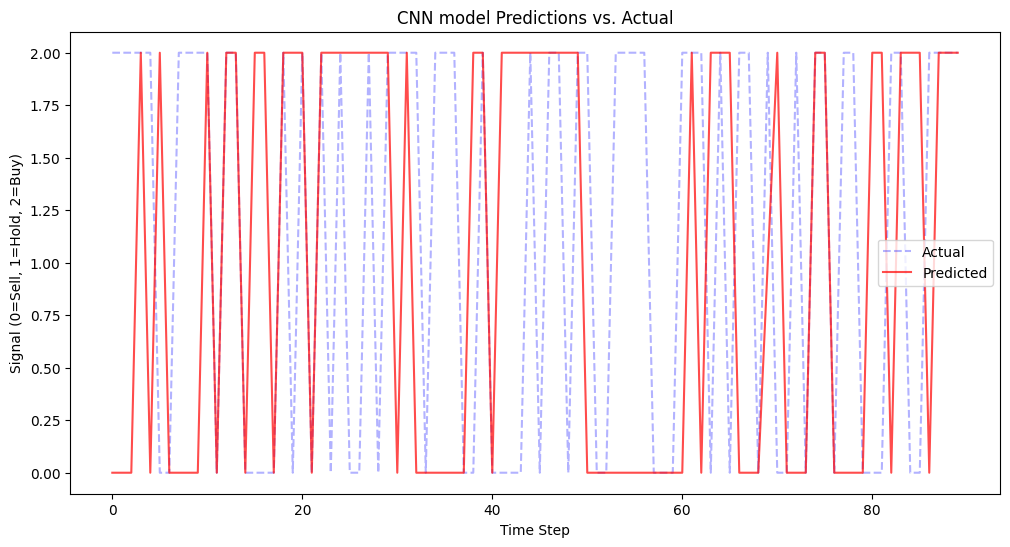

In [177]:
cnn_from_file = CNN()
cnn_from_file.load_state_dict(torch.load(model_path, weights_only=True))

all_predictions, all_targets = predict(cnn_from_file, loader_test)
plot(all_predictions, all_targets, "CNN model Predictions vs. Actual")

In [178]:
test_data_df = test_data.copy()
test_data_df = test_data_df.reset_index()
test_data_df

date      open      high       low     close    volume
0    2024-01-31 12:00:00  0.258107  0.253612  0.266950  0.261853 -0.489040
1    2024-01-31 13:00:00  0.261921  0.262824  0.268523  0.269073 -0.405638
2    2024-01-31 14:00:00  0.269132  0.259765  0.268305  0.264321 -0.342996
3    2024-01-31 15:00:00  0.264379  0.275666  0.262406  0.283453  0.144030
4    2024-01-31 16:00:00  0.283511  0.287920  0.291507  0.297780 -0.106182
...                  ...       ...       ...       ...       ...       ...
8780 2025-01-31 08:00:00  1.076054  1.067322  1.085945  1.071993 -0.390629
8781 2025-01-31 09:00:00  1.072040  1.086550  1.086775  1.097528 -0.437701
8782 2025-01-31 10:00:00  1.097575  1.087129  1.105626  1.100378 -0.443664
8783 2025-01-31 11:00:00  1.100416  1.144640  1.117074  1.157269  0.814200
8784 2025-01-31 12:00:00  1.157315  1.162934  1.165690  1.174306  0.083859

[8785 rows x 6 columns]

In [179]:
predictions_df = pd.DataFrame(all_predictions, columns=['signal'])
predictions_df

signal
0          2
1          0
2          2
3          0
4          2
...      ...
8770       2
8771       0
8772       2
8773       2
8774       2

[8775 rows x 1 columns]

In [180]:
predictions_df.index = test_data_df.index[window_size:]
df = pd.concat([test_data_df, predictions_df], axis=1).dropna()
df

date      open      high       low     close    volume  \
10   2024-01-31 22:00:00  0.239696  0.236726  0.242603  0.245511 -0.564382   
11   2024-01-31 23:00:00  0.245570  0.237564  0.253833  0.243243 -0.589300   
12   2024-02-01 00:00:00  0.243311  0.238161  0.245364  0.243634 -0.539211   
13   2024-02-01 01:00:00  0.243702  0.233580  0.217233  0.210271  0.207992   
14   2024-02-01 02:00:00  0.210330  0.213013  0.219846  0.223573 -0.443114   
...                  ...       ...       ...       ...       ...       ...   
8780 2025-01-31 08:00:00  1.076054  1.067322  1.085945  1.071993 -0.390629   
8781 2025-01-31 09:00:00  1.072040  1.086550  1.086775  1.097528 -0.437701   
8782 2025-01-31 10:00:00  1.097575  1.087129  1.105626  1.100378 -0.443664   
8783 2025-01-31 11:00:00  1.100416  1.144640  1.117074  1.157269  0.814200   
8784 2025-01-31 12:00:00  1.157315  1.162934  1.165690  1.174306  0.083859   

      signal  
10       2.0  
11       0.0  
12       2.0  
13       0.0  
14       2.0  
...      ...  
8780     2.0  
8781     0.0  
8782     2.0  
8783     2.0  
8784     2.0  

[8775 rows x 7 columns]

In [181]:
df.columns = df.columns.str.capitalize()
df

Date      Open      High       Low     Close    Volume  \
10   2024-01-31 22:00:00  0.239696  0.236726  0.242603  0.245511 -0.564382   
11   2024-01-31 23:00:00  0.245570  0.237564  0.253833  0.243243 -0.589300   
12   2024-02-01 00:00:00  0.243311  0.238161  0.245364  0.243634 -0.539211   
13   2024-02-01 01:00:00  0.243702  0.233580  0.217233  0.210271  0.207992   
14   2024-02-01 02:00:00  0.210330  0.213013  0.219846  0.223573 -0.443114   
...                  ...       ...       ...       ...       ...       ...   
8780 2025-01-31 08:00:00  1.076054  1.067322  1.085945  1.071993 -0.390629   
8781 2025-01-31 09:00:00  1.072040  1.086550  1.086775  1.097528 -0.437701   
8782 2025-01-31 10:00:00  1.097575  1.087129  1.105626  1.100378 -0.443664   
8783 2025-01-31 11:00:00  1.100416  1.144640  1.117074  1.157269  0.814200   
8784 2025-01-31 12:00:00  1.157315  1.162934  1.165690  1.174306  0.083859   

      Signal  
10       2.0  
11       0.0  
12       2.0  
13       0.0  
14       2.0  
...      ...  
8780     2.0  
8781     0.0  
8782     2.0  
8783     2.0  
8784     2.0  

[8775 rows x 7 columns]

In [182]:
df.rename(columns={'Date': 'Datetime'}, inplace=True)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index('Datetime', inplace=True)
df["Signal"] = df["Signal"].astype(int)
df

Open      High       Low     Close    Volume  Signal
Datetime                                                                     
2024-01-31 22:00:00  0.239696  0.236726  0.242603  0.245511 -0.564382       2
2024-01-31 23:00:00  0.245570  0.237564  0.253833  0.243243 -0.589300       0
2024-02-01 00:00:00  0.243311  0.238161  0.245364  0.243634 -0.539211       2
2024-02-01 01:00:00  0.243702  0.233580  0.217233  0.210271  0.207992       0
2024-02-01 02:00:00  0.210330  0.213013  0.219846  0.223573 -0.443114       2
...                       ...       ...       ...       ...       ...     ...
2025-01-31 08:00:00  1.076054  1.067322  1.085945  1.071993 -0.390629       2
2025-01-31 09:00:00  1.072040  1.086550  1.086775  1.097528 -0.437701       0
2025-01-31 10:00:00  1.097575  1.087129  1.105626  1.100378 -0.443664       2
2025-01-31 11:00:00  1.100416  1.144640  1.117074  1.157269  0.814200       2
2025-01-31 12:00:00  1.157315  1.162934  1.165690  1.174306  0.083859       2

[8775 rows x 6 columns]

In [183]:
# Создаем объект класса Backtest с текущей стратегией
bt = Backtest(df, CNNStrategy, cash=1_000_000, commission=.002, exclusive_orders=True)

# Запускаем бэктест
stats = bt.run()
bt.plot()

GridPlot(id='p3988', ...)

In [196]:
print(stats)

Start                     2024-10-10 23:00:00
End                       2025-01-09 17:00:00
Duration                     90 days 18:00:00
Exposure Time [%]                   99.908215
Equity Final [$]                713073.289728
Equity Peak [$]                1035736.374922
Return [%]                         -28.692671
Buy & Hold Return [%]               228.75738
Return (Ann.) [%]                  -73.858784
Volatility (Ann.) [%]                 4.67421
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -31.153013
Avg. Drawdown [%]                   -3.394124
Max. Drawdown Duration       83 days 03:00:00
Avg. Drawdown Duration        8 days 06:00:00
# Trades                                  978
Win Rate [%]                        41.206544
Best Trade [%]                      19.364936
Worst Trade [%]                    -15.903709
Avg. Trade [%]                    